In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import os 
import h5py
import sys
%matplotlib inline 

In [2]:
print(os.listdir('./../../../../data/hongtao'))

# path = os.path('./../../../../data/hongtao/variables_tt_re1.h5')

# os.path.abspath("data/hongtao")

['variables_tt_re1.h5', 'variables_tt_rmu.h5', 'variables_tt_re.h5', 'variablestt_bmu1.h5', 'variablestt_be1.h5']


In [3]:
os.chdir('./../../../../data/hongtao')
be = h5py.File('./../../../../data/hongtao/variables_tt_re.h5','r')
bmu = h5py.File('./../../../../data/hongtao/variables_tt_rmu.h5','r')
be1 = h5py.File('./../../../../data/hongtao/variables_tt_re1.h5','r')
print(be.keys())
print('')
print(be1.keys())
dataset = be1

<KeysViewHDF5 ['j1_eta', 'j1_isbtag', 'j1_m', 'j1_phi', 'j1_pt', 'j2_eta', 'j2_isbtag', 'j2_m', 'j2_phi', 'j2_pt', 'j3_eta', 'j3_isbtag', 'j3_m', 'j3_phi', 'j3_pt', 'j4_eta', 'j4_isbtag', 'j4_m', 'j4_phi', 'j4_pt', 'j5_eta', 'j5_isbtag', 'j5_m', 'j5_phi', 'j5_pt', 'j6_eta', 'j6_isbtag', 'j6_m', 'j6_phi', 'j6_pt', 'j7_eta', 'j7_isbtag', 'j7_m', 'j7_phi', 'j7_pt', 'j8_eta', 'j8_isbtag', 'j8_m', 'j8_phi', 'j8_pt', 'lep_eta', 'lep_m', 'lep_phi', 'lep_pt', 'met_met', 'met_phi', 'mttReco', 'mttTrue']>

<KeysViewHDF5 ['bh_eta', 'bh_phi', 'bh_pt', 'bl_eta', 'bl_phi', 'bl_pt', 'j1_DL1r', 'j1_eta', 'j1_isbtag', 'j1_m', 'j1_phi', 'j1_pt', 'j2_DL1r', 'j2_eta', 'j2_isbtag', 'j2_m', 'j2_phi', 'j2_pt', 'j3_DL1r', 'j3_eta', 'j3_isbtag', 'j3_m', 'j3_phi', 'j3_pt', 'j4_DL1r', 'j4_eta', 'j4_isbtag', 'j4_m', 'j4_phi', 'j4_pt', 'j5_DL1r', 'j5_eta', 'j5_isbtag', 'j5_m', 'j5_phi', 'j5_pt', 'j6_DL1r', 'j6_eta', 'j6_isbtag', 'j6_m', 'j6_phi', 'j6_pt', 'j7_DL1r', 'j7_eta', 'j7_isbtag', 'j7_m', 'j7_phi', 'j7_pt'

In [4]:
input_keys = ['j1_pt', 'j1_eta', 'j1_phi', 'j1_m', 'j1_DL1r', 'j2_pt', 'j2_eta', 'j2_phi', 'j2_m', 'j2_DL1r', 'j3_pt', 'j3_eta', 'j3_phi', 'j3_m', 'j3_DL1r', 'j4_pt', 'j4_eta', 'j4_phi', 'j4_m', 'j4_DL1r', 'j5_pt', 'j5_eta', 'j5_phi', 'j5_m', 'j5_DL1r', 'j6_pt', 'j6_eta', 'j6_phi', 'j6_m', 'j6_DL1r', 'j7_pt', 'j7_eta', 'j7_phi','j7_m', 'j7_DL1r', 'j8_pt', 'j8_eta', 'j8_phi','j8_m', 'j8_DL1r', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_m', 'met_met', 'met_phi'] 
output_keys = ['th_pt', 'th_eta','th_phi', 'tl_pt', 'tl_eta', 'tl_phi']
# output_keys = ['th_eta','th_phi', 'tl_eta', 'tl_phi']

output_length = len(output_keys)

In [5]:
# Convert into numpy arrays and mean normalize
crop =  100000

input_arrays = []
output_arrays = [] 
in_std = []
in_mean = []
out_std = []
out_mean = []

# for key in input_keys:
#     exec(key + ' = np.array(dataset.get(key))[0:crop].reshape((1,-1))')
#     exec('{0} = ({0} - np.mean({0}))/np.std({0})'.format(key))
#     exec('input_arrays.append({0})'.format(key))

    
def convert_normalize(keys, std, mean, total):
    for x in keys:
        var = np.array(dataset.get(x))[0:crop].reshape((1,-1))
        sig = np.std(var)
        mu = np.mean(var)
        std.append(np.std(var))
        mean.append(np.mean(var))
        var = (var - mu)/sig 
        total.append(var)

    
convert_normalize(input_keys, in_std, in_mean, input_arrays)
convert_normalize(output_keys, out_std, out_mean, output_arrays)

out_std = np.array(out_std).reshape((1,-1))
out_mean = np.array(out_mean).reshape((1,-1))
in_std = np.array(in_std).reshape((1,-1))
in_mean = np.array(in_mean).reshape((1,-1))

In [6]:
# Create input and test array
split = int(np.floor(0.8*crop)) # 80/20 split 
shuffle = True
    
total_input = np.stack(input_arrays).reshape((crop, len(input_keys)))
total_output = np.stack(output_arrays).reshape((crop, len(output_keys)))

if shuffle:
    rng_state = np.random.get_state()
    np.random.shuffle(total_input)
    np.random.set_state(rng_state)
    np.random.shuffle(total_output)
    
# size = total_input.shape
# total_input = np.array(np.random.normal(size=total_input.shape))

train_input, test_input = total_input[0:split, :], total_input[split:, :]
train_output, test_output = total_output[0:split,:], total_output[split:,:]

In [7]:
print(train_input.shape, train_output.shape)
print(test_input.shape, test_output.shape)

(80000, 46) (80000, 6)
(20000, 46) (20000, 6)


In [8]:
# Build model

# optimizer = keras.optimizers.RMSprop(learning_rate = 1e-5)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)

def build_model():
    model = keras.Sequential([
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001),
                     input_shape=[len(input_keys)]),
        layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
        layers.Dense(64, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
        layers.Dense(len(output_keys), kernel_regularizer=regularizers.l2(0.0001), activation='linear')
    ])
    
    model.compile(loss='mse', optimizer= optimizer, metrics=['mse'])
    return model 

# def build_model():
#     model = keras.Sequential([
#         layers.Dense(6, activation='linear', 
#                      input_shape=[len(input_keys)])])
    
#     model.compile(loss='mse', optimizer= optimizer, metrics=['mse'])
    
#     return model 
    

In [9]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               12032     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 53,574
Trainable params: 53,574
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Fit model

Epochs= 512

history = model.fit(train_input, train_output, verbose=1, epochs=Epochs, 
                   validation_split=0.2, shuffle=True,
                   batch_size=512)


Epoch 1/512
125/125 [==============================] - 1s 5ms/step - loss: 1.0808 - mse: 1.0463 - val_loss: 1.0498 - val_mse: 1.0155
Epoch 2/512
125/125 [==============================] - 1s 4ms/step - loss: 1.0454 - mse: 1.0113 - val_loss: 1.0411 - val_mse: 1.0071
Epoch 3/512
125/125 [==============================] - 1s 4ms/step - loss: 1.0390 - mse: 1.0051 - val_loss: 1.0380 - val_mse: 1.0043
Epoch 4/512
125/125 [==============================] - 1s 4ms/step - loss: 1.0356 - mse: 1.0021 - val_loss: 1.0362 - val_mse: 1.0028
Epoch 5/512
125/125 [==============================] - 1s 4ms/step - loss: 1.0334 - mse: 1.0002 - val_loss: 1.0354 - val_mse: 1.0022
Epoch 6/512
125/125 [==============================] - 1s 4ms/step - loss: 1.0317 - mse: 0.9987 - val_loss: 1.0348 - val_mse: 1.0020
Epoch 7/512
125/125 [==============================] - 1s 4ms/step - loss: 1.0301 - mse: 0.9975 - val_loss: 1.0344 - val_mse: 1.0018
Epoch 8/512
125/125 [==============================] - 1s 4ms/step - 

125/125 [==============================] - 1s 4ms/step - loss: 0.9822 - mse: 0.9529 - val_loss: 1.0474 - val_mse: 1.0181
Epoch 63/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9814 - mse: 0.9521 - val_loss: 1.0478 - val_mse: 1.0185
Epoch 64/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9807 - mse: 0.9513 - val_loss: 1.0488 - val_mse: 1.0194
Epoch 65/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9800 - mse: 0.9505 - val_loss: 1.0494 - val_mse: 1.0199
Epoch 66/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9794 - mse: 0.9498 - val_loss: 1.0506 - val_mse: 1.0210
Epoch 67/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9785 - mse: 0.9489 - val_loss: 1.0507 - val_mse: 1.0210
Epoch 68/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9779 - mse: 0.9481 - val_loss: 1.0507 - val_mse: 1.0209
Epoch 69/512
125/125 [==============================] - 1s 4ms/step - loss:

125/125 [==============================] - 1s 4ms/step - loss: 0.9445 - mse: 0.9095 - val_loss: 1.0887 - val_mse: 1.0536
Epoch 124/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9441 - mse: 0.9090 - val_loss: 1.0895 - val_mse: 1.0543
Epoch 125/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9435 - mse: 0.9083 - val_loss: 1.0902 - val_mse: 1.0549
Epoch 126/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9431 - mse: 0.9078 - val_loss: 1.0909 - val_mse: 1.0555
Epoch 127/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9426 - mse: 0.9071 - val_loss: 1.0919 - val_mse: 1.0564
Epoch 128/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9422 - mse: 0.9067 - val_loss: 1.0920 - val_mse: 1.0564
Epoch 129/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9417 - mse: 0.9061 - val_loss: 1.0933 - val_mse: 1.0576
Epoch 130/512
125/125 [==============================] - 1s 4ms/step 

Epoch 184/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9193 - mse: 0.8792 - val_loss: 1.1251 - val_mse: 1.0851
Epoch 185/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9188 - mse: 0.8787 - val_loss: 1.1251 - val_mse: 1.0850
Epoch 186/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9187 - mse: 0.8785 - val_loss: 1.1257 - val_mse: 1.0854
Epoch 187/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9184 - mse: 0.8781 - val_loss: 1.1265 - val_mse: 1.0862
Epoch 188/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9179 - mse: 0.8776 - val_loss: 1.1265 - val_mse: 1.0862
Epoch 189/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9176 - mse: 0.8772 - val_loss: 1.1276 - val_mse: 1.0872
Epoch 190/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9172 - mse: 0.8767 - val_loss: 1.1279 - val_mse: 1.0874
Epoch 191/512
125/125 [==============================] 

125/125 [==============================] - 1s 4ms/step - loss: 0.9009 - mse: 0.8570 - val_loss: 1.1523 - val_mse: 1.1084
Epoch 245/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9006 - mse: 0.8566 - val_loss: 1.1531 - val_mse: 1.1091
Epoch 246/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9003 - mse: 0.8562 - val_loss: 1.1539 - val_mse: 1.1098
Epoch 247/512
125/125 [==============================] - 1s 4ms/step - loss: 0.9000 - mse: 0.8559 - val_loss: 1.1537 - val_mse: 1.1096
Epoch 248/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8999 - mse: 0.8557 - val_loss: 1.1531 - val_mse: 1.1089
Epoch 249/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8995 - mse: 0.8553 - val_loss: 1.1552 - val_mse: 1.1110
Epoch 250/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8991 - mse: 0.8548 - val_loss: 1.1546 - val_mse: 1.1103
Epoch 251/512
125/125 [==============================] - 1s 4ms/step 

Epoch 305/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8864 - mse: 0.8391 - val_loss: 1.1767 - val_mse: 1.1295
Epoch 306/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8861 - mse: 0.8389 - val_loss: 1.1750 - val_mse: 1.1277
Epoch 307/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8861 - mse: 0.8388 - val_loss: 1.1764 - val_mse: 1.1291
Epoch 308/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8859 - mse: 0.8385 - val_loss: 1.1769 - val_mse: 1.1295
Epoch 309/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8855 - mse: 0.8381 - val_loss: 1.1784 - val_mse: 1.1310
Epoch 310/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8854 - mse: 0.8380 - val_loss: 1.1772 - val_mse: 1.1297
Epoch 311/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8851 - mse: 0.8376 - val_loss: 1.1790 - val_mse: 1.1314
Epoch 312/512
125/125 [==============================] 

125/125 [==============================] - 1s 4ms/step - loss: 0.8754 - mse: 0.8255 - val_loss: 1.1964 - val_mse: 1.1465
Epoch 366/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8751 - mse: 0.8251 - val_loss: 1.1965 - val_mse: 1.1465
Epoch 367/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8750 - mse: 0.8250 - val_loss: 1.1961 - val_mse: 1.1461
Epoch 368/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8748 - mse: 0.8248 - val_loss: 1.1961 - val_mse: 1.1460
Epoch 369/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8749 - mse: 0.8248 - val_loss: 1.1972 - val_mse: 1.1471
Epoch 370/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8744 - mse: 0.8243 - val_loss: 1.1982 - val_mse: 1.1481
Epoch 371/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8744 - mse: 0.8242 - val_loss: 1.1980 - val_mse: 1.1478
Epoch 372/512
125/125 [==============================] - 1s 4ms/step 

Epoch 426/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8663 - mse: 0.8140 - val_loss: 1.2141 - val_mse: 1.1618
Epoch 427/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8660 - mse: 0.8137 - val_loss: 1.2142 - val_mse: 1.1618
Epoch 428/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8661 - mse: 0.8137 - val_loss: 1.2134 - val_mse: 1.1611
Epoch 429/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8657 - mse: 0.8133 - val_loss: 1.2144 - val_mse: 1.1620
Epoch 430/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8656 - mse: 0.8132 - val_loss: 1.2133 - val_mse: 1.1608
Epoch 431/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8656 - mse: 0.8132 - val_loss: 1.2143 - val_mse: 1.1619
Epoch 432/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8655 - mse: 0.8130 - val_loss: 1.2144 - val_mse: 1.1619
Epoch 433/512
125/125 [==============================] 

125/125 [==============================] - 1s 4ms/step - loss: 0.8587 - mse: 0.8045 - val_loss: 1.2267 - val_mse: 1.1724
Epoch 487/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8586 - mse: 0.8043 - val_loss: 1.2276 - val_mse: 1.1733
Epoch 488/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8587 - mse: 0.8044 - val_loss: 1.2281 - val_mse: 1.1738
Epoch 489/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8584 - mse: 0.8040 - val_loss: 1.2280 - val_mse: 1.1736
Epoch 490/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8583 - mse: 0.8039 - val_loss: 1.2288 - val_mse: 1.1744
Epoch 491/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8583 - mse: 0.8039 - val_loss: 1.2289 - val_mse: 1.1745
Epoch 492/512
125/125 [==============================] - 1s 4ms/step - loss: 0.8583 - mse: 0.8038 - val_loss: 1.2284 - val_mse: 1.1739
Epoch 493/512
125/125 [==============================] - 1s 4ms/step 

In [11]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

Text(0.5, 1.0, 'MSE loss')

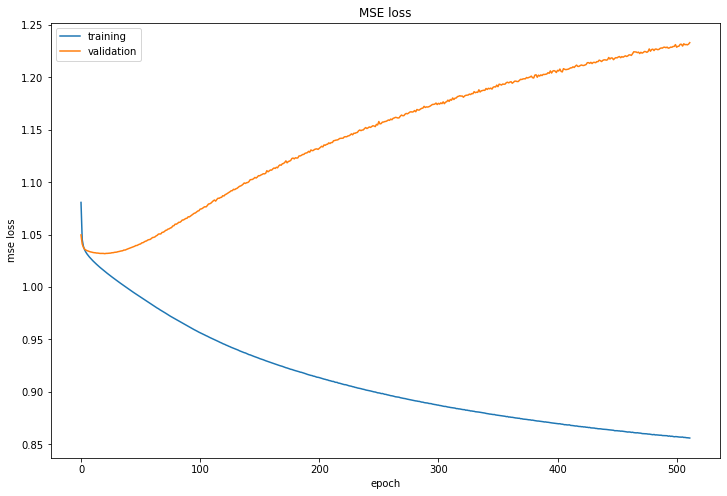

In [12]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('mse loss')
plt.legend()
plt.title('MSE loss')

In [13]:
predictions = model.predict(test_input)

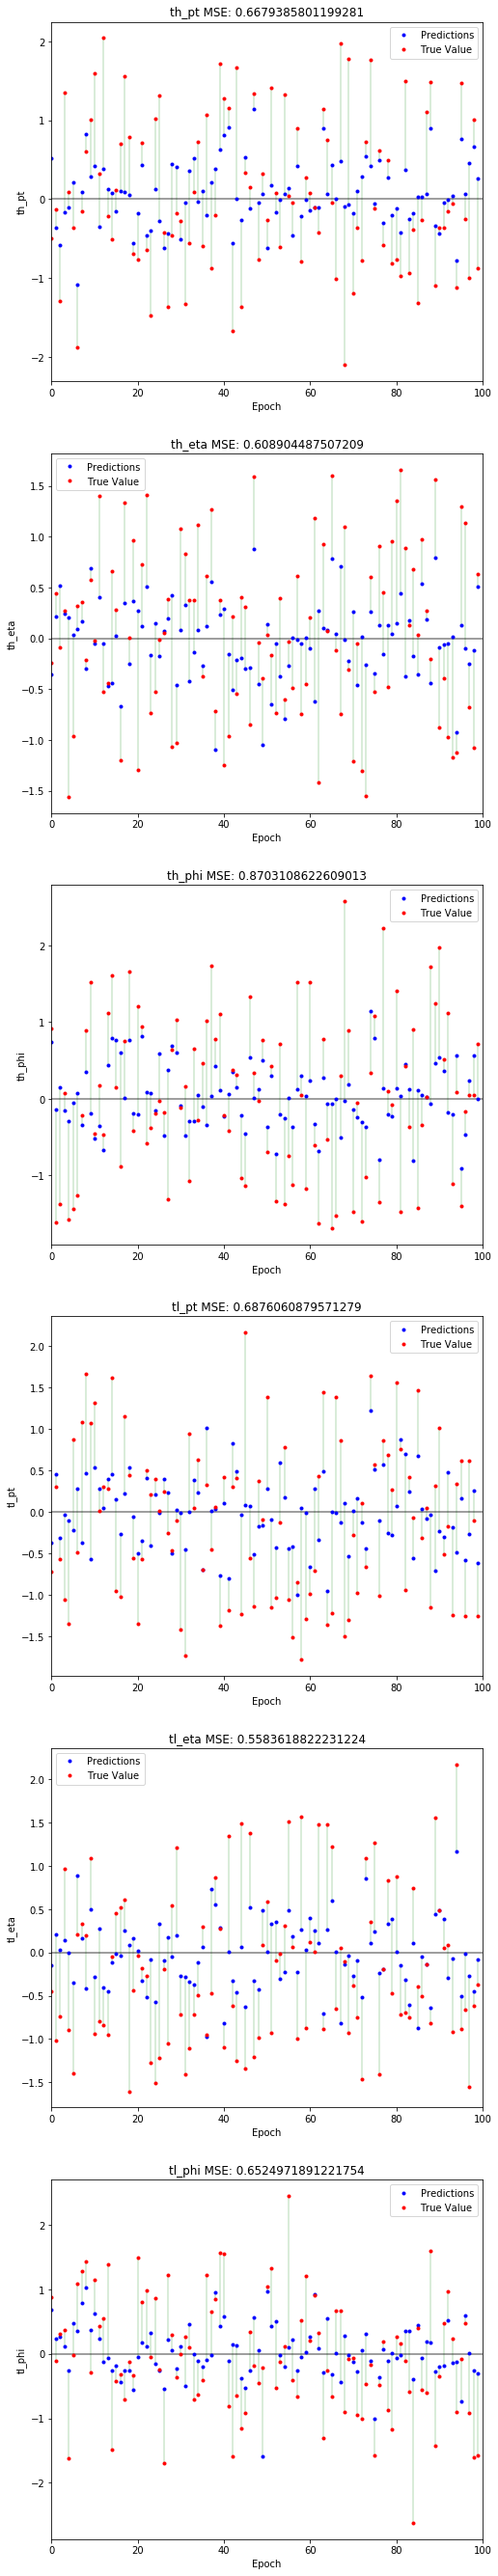

In [14]:
# Training 
crop = 100 

train_small = model.predict(train_input[0:100,:])
output_small = train_output[0:100,:]

def comparison_plot(compare, true):
    plt.figure(figsize=(8,8*output_length))
    for i in range(0,output_length):
        plt.subplot(output_length,1,i+1)
        plt.plot(range(0,crop), compare[:,i], 'bo', markersize=3, label = 'Predictions')
        plt.plot(range(0,crop), true[:,i], 'ro', markersize=3, label = 'True Value')
        ym, yM = plt.ylim()
        for x in range(100):
            plt.vlines(x, color='g', linestyle='-', alpha=0.2, ymin= 
                        min(compare[x,i], true[x,i]), 
                        ymax= max(compare[x,i], true[x,i]))
        plt.hlines(0, xmin=-20, xmax=crop+20, alpha=0.5)
        MSE = 1/compare[:,i].size*np.sum((compare[:,i]- true[:,i])**2)
        plt.xlabel('Epoch')
        plt.ylabel(output_keys[i])
        plt.xlim(0, crop)
        plt.title(output_keys[i] + " MSE: " + str(MSE))
        plt.legend()

comparison_plot(train_small, output_small)

In [15]:
# Predictions

predictions_small = predictions[0:crop,:]
test_output_small = test_output[0:crop,:]

MSE = 1/predictions.size*np.sum((predictions- test_output)**2)
print("total MSE: " + str(MSE))

for i in range(output_length):
    MSE = 1/predictions[:,i].size*np.sum((predictions[:,i] -test_output[:,i])**2)
    print("{0} MSE : ".format(output_keys[i]), '%.10f'%MSE)

total MSE: 1.1823470436215513
th_pt MSE :  1.1871851684
th_eta MSE :  1.1846390678
th_phi MSE :  1.1631932719
tl_pt MSE :  1.1918569472
tl_eta MSE :  1.1934070007
tl_phi MSE :  1.1738008057


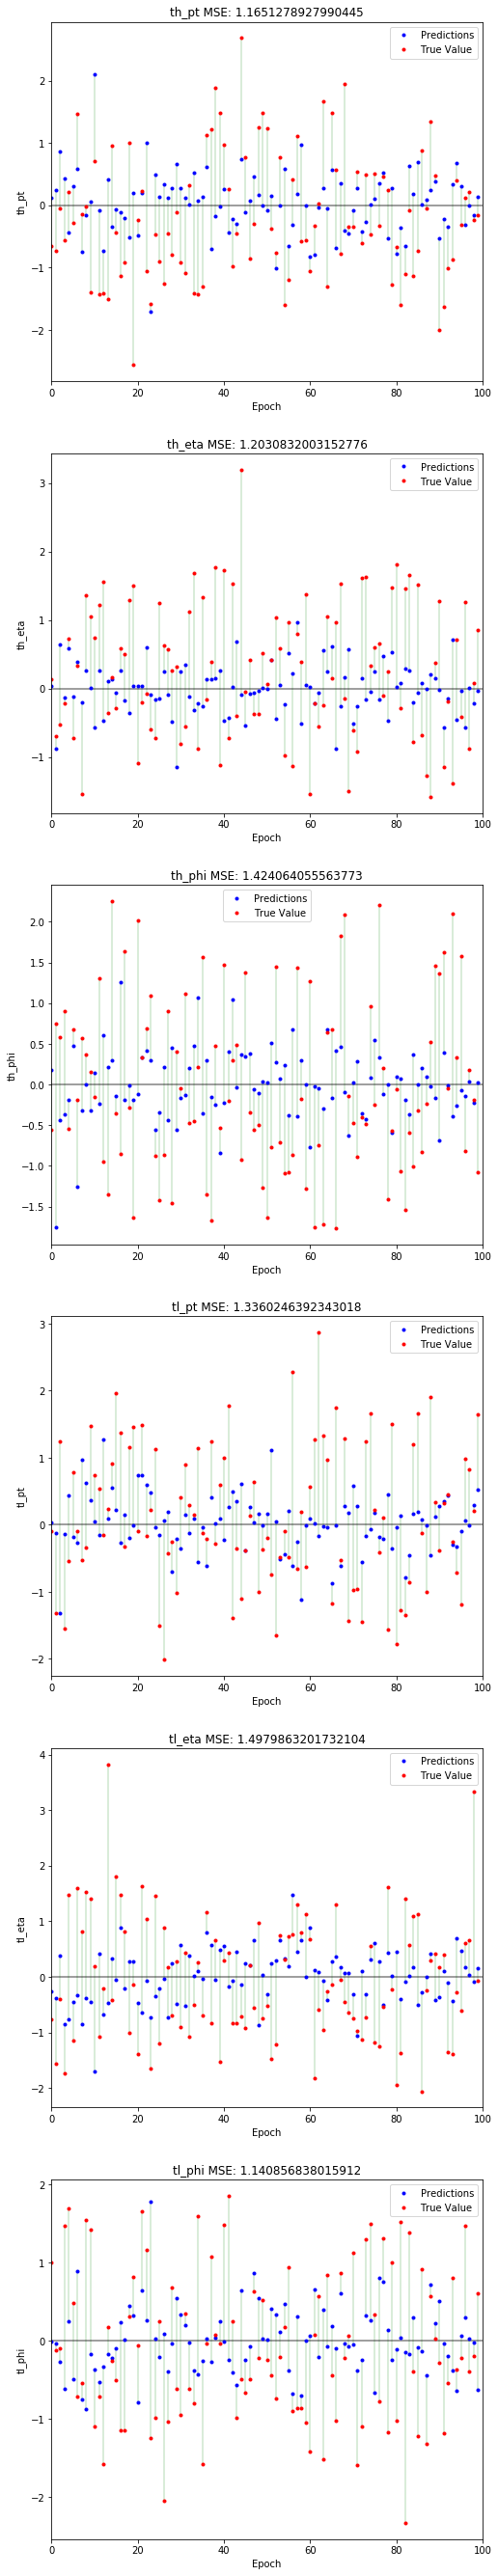

In [16]:
comparison_plot(predictions_small, test_output_small)

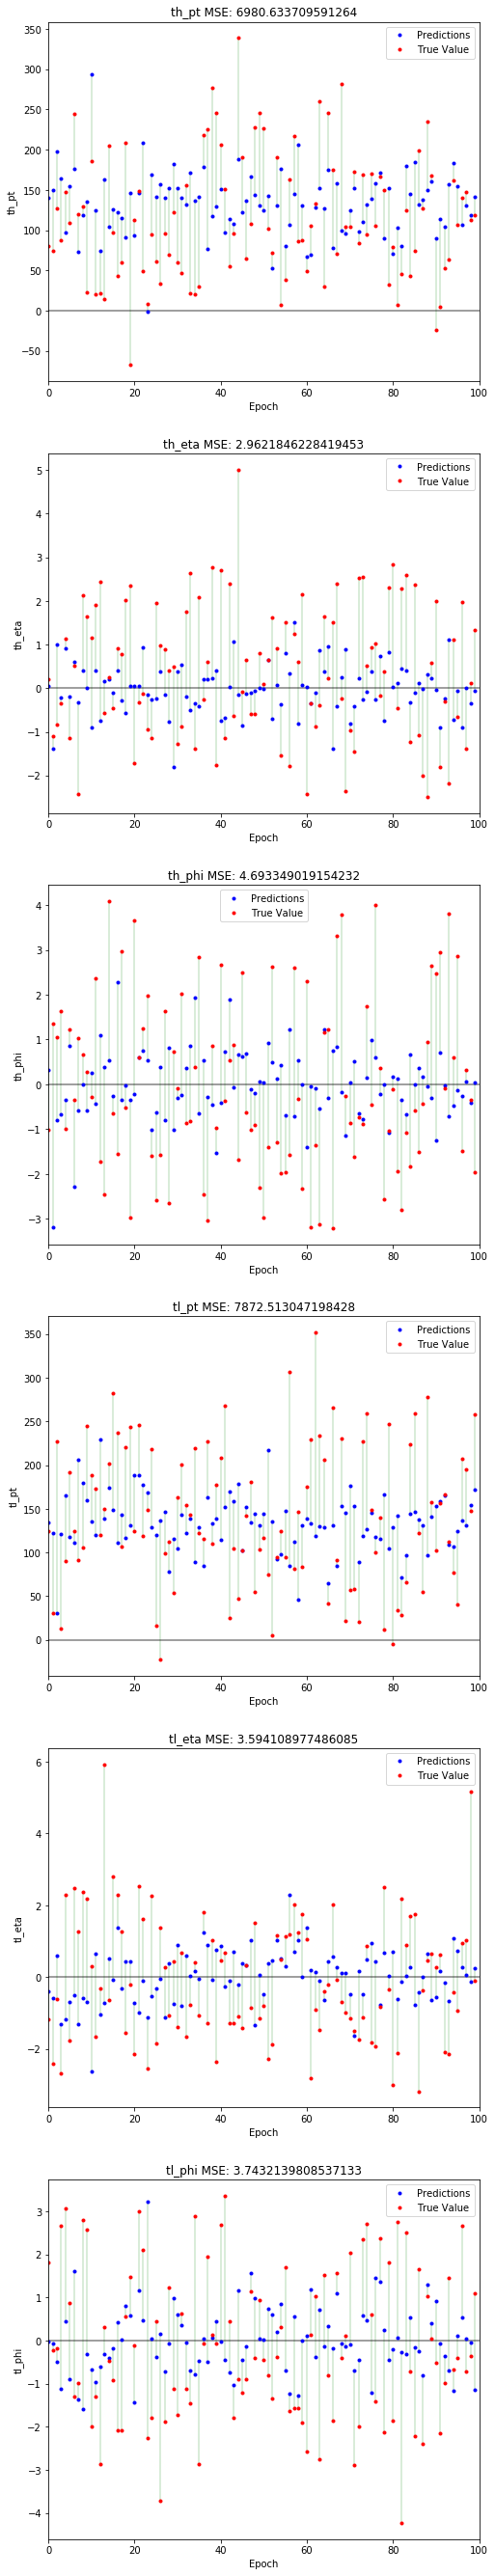

In [17]:
# Back to original units 

scaled_predictions = predictions*out_std + out_mean
scaled_output = test_output*out_std + out_mean

comparison_plot(scaled_predictions[0:crop,:], scaled_output[0:crop,:])


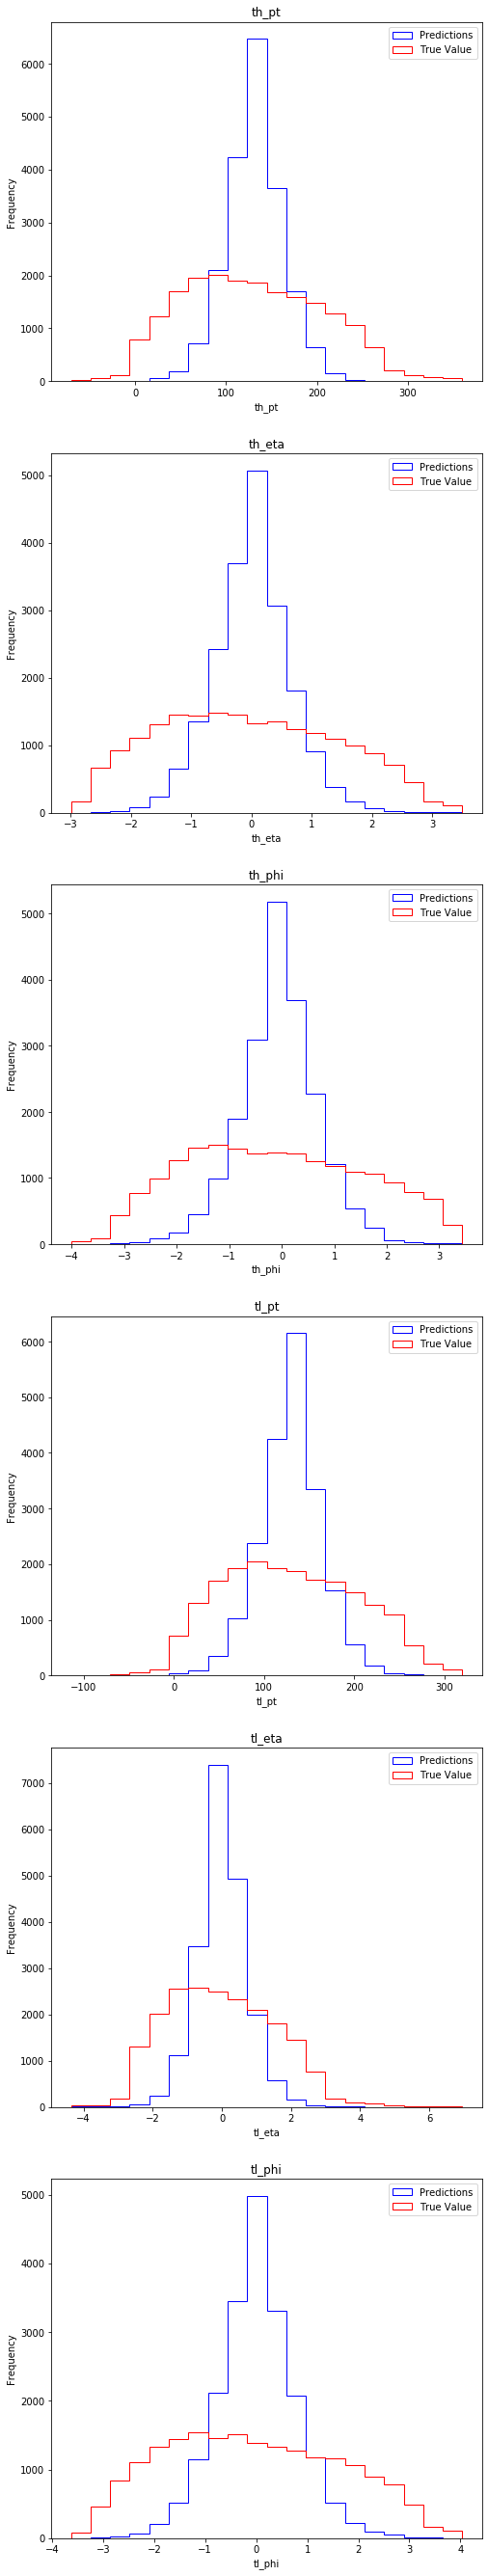

In [18]:
# Histograms 

def histograms(compare, true):
    plt.figure(figsize=(8,8*output_length))
    for i in range(0, output_length):
        plt.subplot(output_length,1,i+1)
        histo, bin_edges = np.histogram(compare[:,i],20)
        plt.hist(compare[:,i], bin_edges, histtype = 'step', color='b', label='Predictions')
        plt.hist(true[:,i], bin_edges, histtype = 'step', color='r', label='True Value')
        plt.xlabel(output_keys[i])
        plt.ylabel('Frequency')
        plt.title(output_keys[i])
        plt.legend()

histograms(scaled_predictions, scaled_output)